In [30]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score
from sklearn import datasets

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

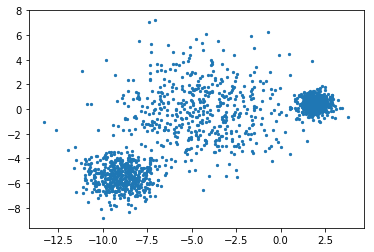

In [32]:
X = varied[0]
# X = datasets.load_iris().data
ClusterUtils.visualize_sample_data(X)

In [33]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['AgglomerativeClustering', 'GaussianMixture', 'MiniBatchKMeans'], 
                                       dim_reduction_alg_ls=[],
                                       n_evaluations=50, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * calinski_harabasz_score(X, y_pred)  
                                      )

Configuration space object:
  Hyperparameters:
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    clustering_choice, Type: Categorical, Choices: {AgglomerativeClustering, GaussianMixture, MiniBatchKMeans}, Default: AgglomerativeClustering
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    init_params___GaussianMixture, Type: Categorical, Choices: {kmeans, random}, Default: kmeans
    linkage___AgglomerativeClustering, Type: Categorical, Choices: {ward, complete, average, single}, Default: complete
    n_clusters___AgglomerativeClustering, Type: UniformInteger, Range: [1, 20], Default: 10
    n_clusters___MiniBatchKMeans, Type: UniformInteger, Range: [1, 15], Default: 10
    n_components___GaussianMixture, Type: UniformInteger, Range: [1, 20], Def

Fitting configuration: {'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 15, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'spherical'}
Evaluating configuration ... 
Fitting configuration: {'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 5, 'warm_start___GaussianMixture': True, 'init_params___GaussianMixture': 'random', 'covariance_type___GaussianMixture': 'spherical'}
Evaluating configuration ... 
Fitting configuration: {'clustering_choice': 'AgglomerativeClustering', 'n_clusters___AgglomerativeClustering': 14, 'affinity___AgglomerativeClustering': 'cosine', 'linkage___AgglomerativeClustering': 'complete'}
Evaluating configuration ... 
Fitting configuration: {'clustering_choice': 'AgglomerativeClustering', 'n_clusters___AgglomerativeClustering': 11, 'affinity___AgglomerativeClustering': 'euclidean', 'linkage___AgglomerativeClustering': 'ward'}
Evaluating configuration ... 
Fitting configuration: {'clu

Fitting configuration: {'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 865, 'n_clusters___MiniBatchKMeans': 14}
Evaluating configuration ... 
Fitting configuration: {'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 1, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'tied'}
Evaluating configuration ... 


Fitting configuration: {'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 1, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'full'}
Evaluating configuration ... 


Fitting configuration: {'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 11, 'init_params___GaussianMixture': 'random', 'covariance_type___GaussianMixture': 'spherical'}
Evaluating configuration ... 
Fitting configuration: {'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 690, 'n_clusters___MiniBatchKMeans': 14}
Evaluating configuration ... 
Fitting configuration: {'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 4, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'full'}
Evaluating configuration ... 
Fitting configuration: {'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 13, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___GaussianMixture': 'spherical'}
Evaluating configuration ... 
Fitting configuration: {'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 2, 'init_params___GaussianMixture': 'kmeans', 'covariance_type___G

In [34]:
opt_result

Configuration:
  clustering_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'full'
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 4
  warm_start___GaussianMixture, Value: False

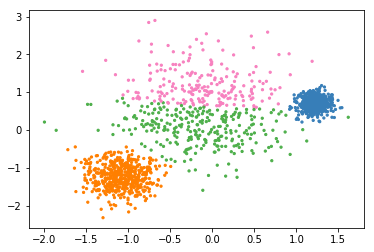

array([3, 3, 1, ..., 0, 0, 0])

In [35]:
autocluster.predict(X)

In [36]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   clustering_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'complete'
   n_clusters___AgglomerativeClustering, Value: 10
 , ta_runs=0, ta_time_used=0, wallclock_time=0.0003020763397216797),
 TrajEntry(train_perf=-2711.797170352057, incumbent_id=1, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   clustering_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'complete'
   n_clusters___AgglomerativeClustering, Value: 10
 , ta_runs=1, ta_time_used=0.18685603141784668, wallclock_time=0.20558762550354004),
 TrajEntry(train_perf=-3014.9556610491827, incumbent_id=2, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'spherical'
   init_params___GaussianMixture, Value: 'kmeans'
   n_compo

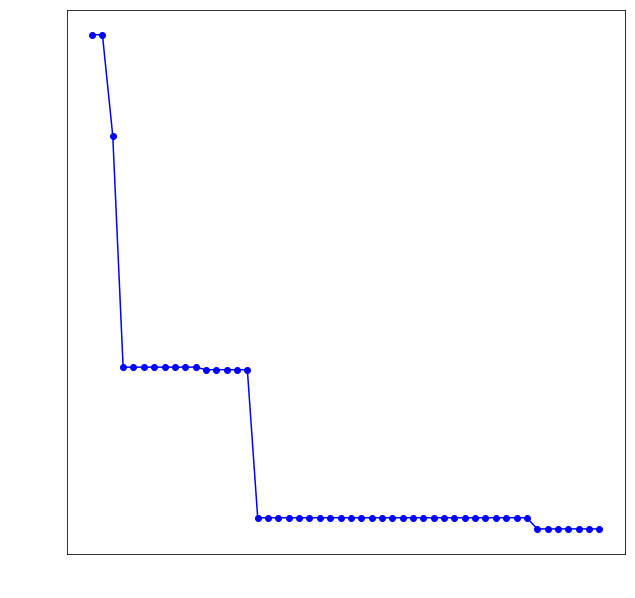

In [37]:
autocluster.plot_convergence()